In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
supply=pd.read_csv("supply_data.csv")

In [3]:
demand=pd.read_csv("demand_data.csv")


In [4]:
supply.head(5)

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


## Supply_dataset(Monthly_data)


*1.Building Permits(Permit Number)*-     Number of building permits allotted.<br>
*2.Construction Spending (Million $)*-  The amount spent (in millions of USD) is a measure of the activity in the construction industry.<br>
*3.Housing Starts(New Housing Project)*-  This is a measure of the number of units of new housing projects started in a given period.<br>
*4.Homes Sold(units)*-   House for sale is a basic measure of supply.<br>

In [5]:
demand.head(5)

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


## Demand_dataset(Quaterly_data)

*1.Mortgage Rates(%)*<br>
*2.USA GDP(Billions$ )-Quarterly Real GDP (adjusted for inflation)*<br>
*3.Unemployment(%)*<br>
*4.Delinquency Rate(%) on Mortgages(Foreclosure on the mortgage)-an indicator of the number of foreclosures in real estate*<br>

# DATA CLEANING

In [6]:
# Removing non-usefull column name 'Unnamed:0'
supply=supply.drop(['Unnamed: 0'], axis=1)

In [7]:
supply.head(5)

,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,01-01-2000,1727,353065,873,1636
1,01-02-2000,1692,351933,856,1737
2,01-03-2000,1651,353452,900,1604
3,01-04-2000,1597,356188,841,1626
4,01-05-2000,1543,349907,857,1575


In [8]:
print(supply.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period          250 non-null    object
 1   Permit_Number   250 non-null    int64 
 2   construction    250 non-null    int64 
 3   Homes_Sold      250 non-null    int64 
 4   Housing_Starts  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB
None


In [9]:
print(demand.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          84 non-null     object 
 1   UNEM_RATE     84 non-null     float64
 2   MORTGAGE      84 non-null     float64
 3   GDPC1         84 non-null     float64
 4   FORECLOSURES  84 non-null     float64
 5   HPI           84 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB
None


In [10]:
# Converting "DATE" column in demand to consistent date format
demand['DATE'] = pd.to_datetime(demand['DATE'])

In [11]:
# Converting "period" column in supply to consistent date format
supply['Period'] = pd.to_datetime(supply['Period'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
supply.rename(columns={'Period': 'DATE'}, inplace=True)
supply['DATE'] = pd.to_datetime(supply['DATE'])

In [12]:
#Mergeing supply and demand into DF
DF=pd.merge(supply,demand)

In [13]:
DF.head(5)

,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,1577,344095,933,1549,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,1699,348279,936,1600,4.23,7.01,13219.251,2.34,110.48


In [14]:
# I extracted the year, month and day from the DATE column to facilitate training, for the model.
DF['year'] = DF['DATE'].dt.year
DF['month'] = DF['DATE'].dt.month
DF['day'] = DF['DATE'].dt.day

In [15]:
DF.head()

,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,year,month,day
0,2000-01-01,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34,2000,1,1
1,2000-04-01,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67,2000,4,1
2,2000-07-01,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79,2000,7,1
3,2000-10-01,1577,344095,933,1549,3.90,7.62,13262.250,2.23,108.27,2000,10,1
4,2001-01-01,1699,348279,936,1600,4.23,7.01,13219.251,2.34,110.48,2001,1,1


In [16]:
DF= DF.drop('DATE', axis=1)

In [17]:
DF.head(3)

,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,year,month,day
0,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34,2000,1,1
1,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67,2000,4,1
2,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79,2000,7,1


In [18]:
print(DF.columns)

Index(['Permit_Number', 'construction', 'Homes_Sold', 'Housing_Starts',
       'UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'HPI', 'year',
       'month', 'day'],
      dtype='object')


In [19]:
DF.isnull().sum()

Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
UNEM_RATE         0
MORTGAGE          0
GDPC1             0
FORECLOSURES      0
HPI               0
year              0
month             0
day               0
dtype: int64

<AxesSubplot:xlabel='month', ylabel='HPI'>

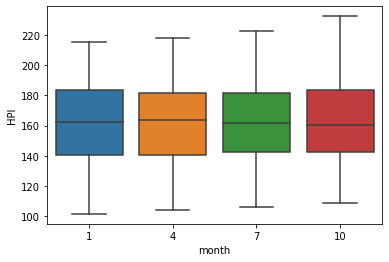

In [20]:
  
   sns.boxplot(x='month',y='HPI', data = DF)
 
    

## Checking outliers

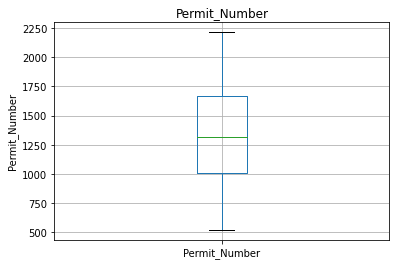

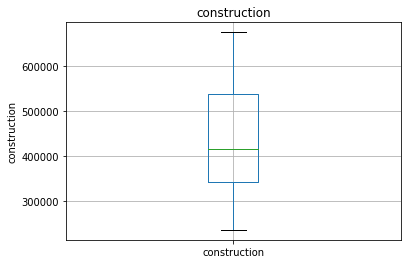

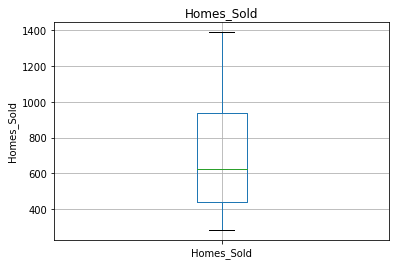

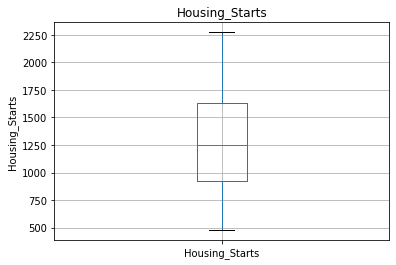

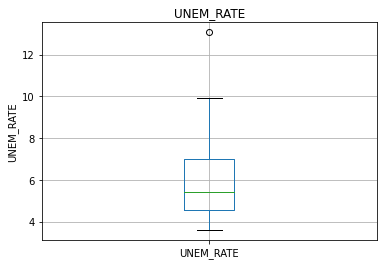

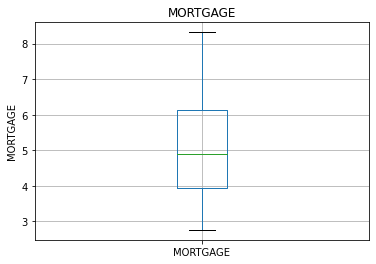

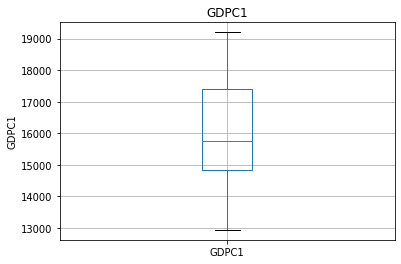

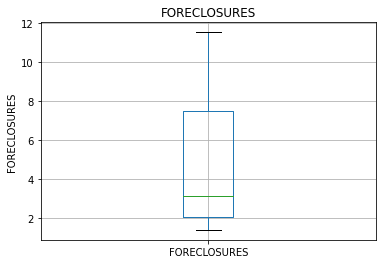

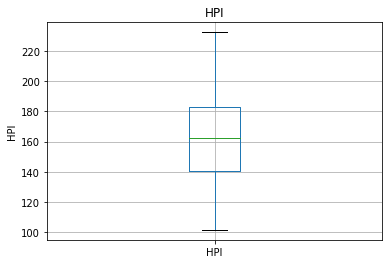

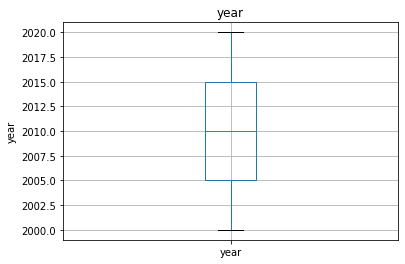

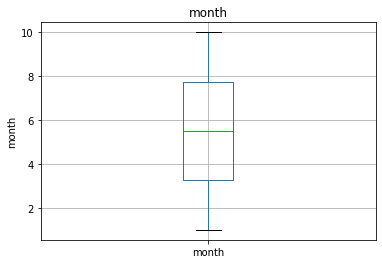

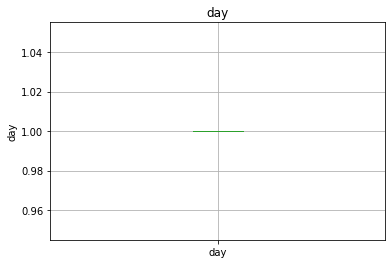

In [21]:

for feature in DF.columns:
    DF.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## NO outliers as such found .

<AxesSubplot:xlabel='year', ylabel='HPI'>

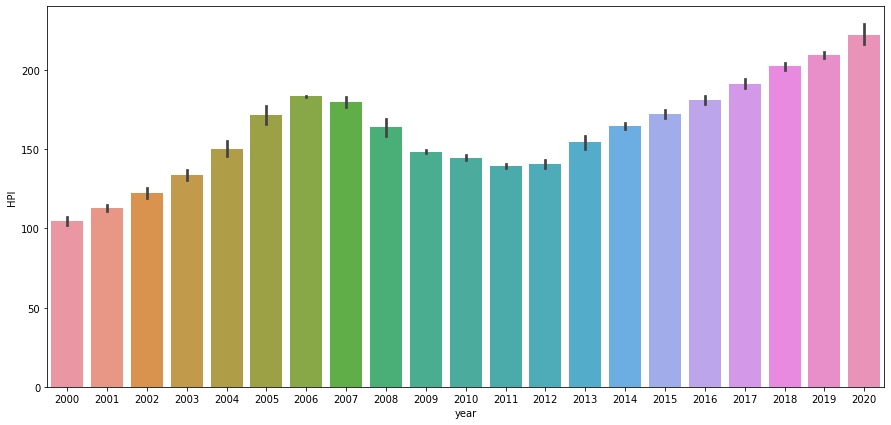

In [22]:
plt.figure(figsize=(15,7))
sns.barplot(x='year',y='HPI',data=DF)

<AxesSubplot:xlabel='year', ylabel='HPI'>

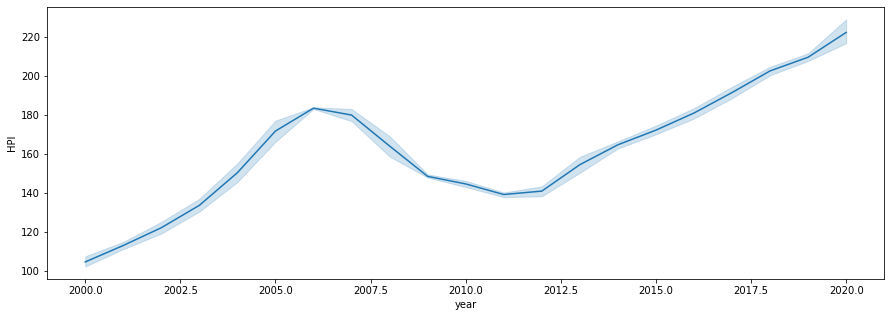

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='HPI',data=DF)

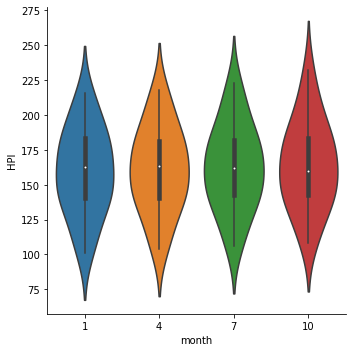

In [24]:
sns.catplot(x="month",y="HPI",kind="violin", data=DF)

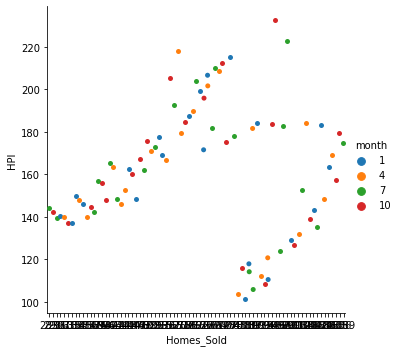

In [25]:
sns.catplot(x='Homes_Sold',y='HPI',hue='month',data=DF)

## checking the corelation of different features with housing price Index(HPI) with heatmap

<AxesSubplot:>

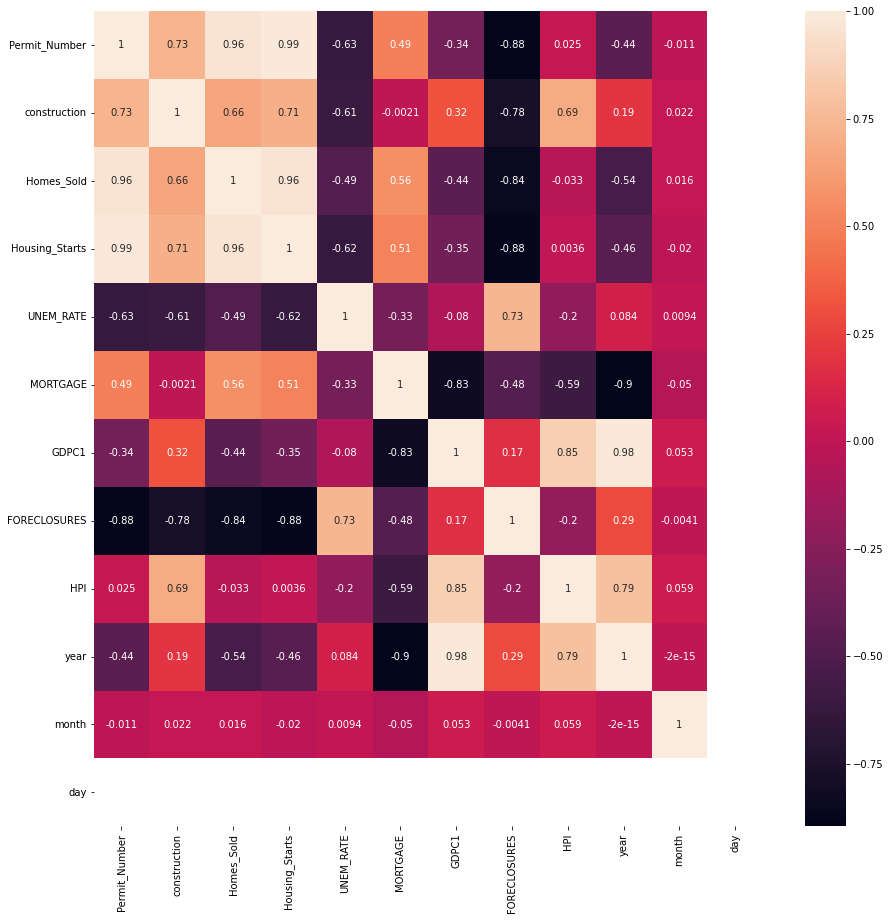

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(DF.corr(),annot=True)

### GDPC and Construction have strong coorelation with HPI

# Model Training

In [27]:
y=DF['HPI']

In [28]:
x=DF.drop(['HPI'], axis=1)

In [29]:
x

,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,year,month,day
0,1727,353065,873,1636,4.03,8.26,12935.252,1.95,2000,1,1
1,1597,356188,841,1626,3.93,8.32,13170.749,1.97,2000,4,1
2,1542,337374,887,1463,4.00,8.02,13183.890,2.09,2000,7,1
3,1577,344095,933,1549,3.90,7.62,13262.250,2.23,2000,10,1
4,1699,348279,936,1600,4.23,7.01,13219.251,2.34,2001,1,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1503,556693,706,1340,3.60,3.70,19202.310,2.34,2019,10,1
80,1536,589103,774,1617,3.80,3.52,18951.992,2.36,2020,1,1
81,1066,562339,570,934,13.07,3.24,17258.205,2.55,2020,4,1
82,1483,575451,979,1487,8.80,2.95,18560.774,2.80,2020,7,1


In [30]:
y

0     101.34
1     103.67
2     105.79
3     108.27
4     110.48
       ...  
79    212.47
80    215.51
81    217.89
82    222.84
83    232.55
Name: HPI, Length: 84, dtype: float64

In [31]:
#spliting our dependent and independent features
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Linear_Regression

In [32]:
import math  
import sklearn.metrics  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(x_train,y_train)
predictions = regressor.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)


4.403961068328888


In [33]:

y_pred=regressor.predict(x_test)
r2_score(y_test,y_pred)

0.9717948047509426

In [34]:
print("Intercept=", regressor.intercept_)
(pd.DataFrame(zip(x.columns, regressor.coef_)))

Intercept= 12655.618959898018


,0,1
0,Permit_Number,-0.021176
1,construction,0.000179
2,Homes_Sold,0.001194
3,Housing_Starts,-0.009498
4,UNEM_RATE,5.802166
5,MORTGAGE,-1.273404
6,GDPC1,0.030675
7,FORECLOSURES,-2.587455
8,year,-6.484919
9,month,-0.590118


In [35]:
intercept=regressor.intercept_
print(intercept)
coefs=regressor.coef_
print(coefs)

12655.618959898018
[-2.11762884e-02  1.79477915e-04  1.19363241e-03 -9.49780732e-03
  5.80216634e+00 -1.27340387e+00  3.06748967e-02 -2.58745461e+00
 -6.48491939e+00 -5.90118006e-01  0.00000000e+00]


In [36]:
print ("HPI = {0:.2f} + {1:.2f}*permit_NO + {2:.2f}*construction + {3:.2f}*Homes_sold + {4:.2f}*Housing_starts  +{5:.2f}*UNEM_rate +{6:.2f}*MORTAGE +{7:.2f}*GDPC1 +{8:.2f}*Foreclousers +{9:.2f}*year +{10:.2f}*month + {11:.2f}*day"
       .
       format(intercept, coefs[0], coefs[1], coefs[2], coefs[3],coefs[4], coefs[5], coefs[6], coefs[7],coefs[8], coefs[9], coefs[10]))

HPI = 12655.62 + -0.02*permit_NO + 0.00*construction + 0.00*Homes_sold + -0.01*Housing_starts  +5.80*UNEM_rate +-1.27*MORTAGE +0.03*GDPC1 +-2.59*Foreclousers +-6.48*year +-0.59*month + 0.00*day


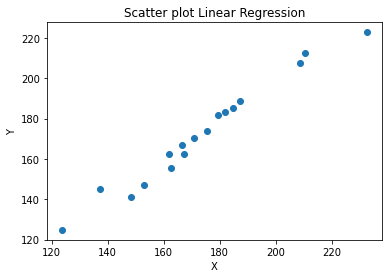

In [41]:
plt.scatter(y_test,y_pred)
plt.title("Scatter plot Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## HPI = 12655.62 + -0.02*permit_NO + 0.00*construction + 0.00*Homes_sold + -0.01*Housing_starts  +5.80*UNEM_rate +-1.27*MORTAGE +0.03*GDPC1 +-2.59*Foreclousers +-6.48*year +-0.59*month + 0.00*day

# RandomForestRegressor


In [38]:
from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor(oob_score =True ,n_jobs = 1,random_state =100)

random_regressor.fit(x_train, y_train)
preds = random_regressor.predict(x_test)

mean_error = sklearn.metrics.mean_squared_error(y_test, preds)  
root_mean = math.sqrt(mean_error) 
root_mean

6.577843455472821

In [39]:
ry_pred=random_regressor.predict(x_test)
r2_score(y_test,ry_pred)

0.9370770267991996

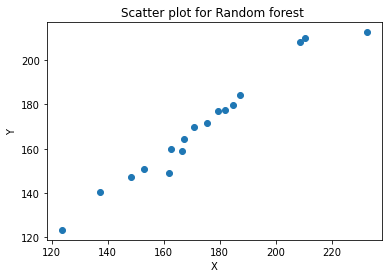

In [42]:
plt.scatter(y_test,ry_pred)
plt.title("Scatter plot for Random forest ")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
